In [ ]:
import os
import sys
import cv2
import numpy as np
from pathlib import Path

from matplotlib import pyplot as plt
from random import randint
import shutil
from icecream import ic
from random import random
from random import sample
import torch
from torchvision.transforms import v2
from torchvision.io import read_image
from torchvision.io import ImageReadMode
from torchvision.transforms import ToTensor
from torchvision.transforms import functional as F
from PIL import Image
from PIL import ImageOps
import PIL


os.chdir('..')
display(os.getcwd())
from lib.class_load import LoadFiles
from features.preprocess import PrepareImageUtils

Definicion de rutas de salida

In [ ]:
DATASET_FOLDER = Path('/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data')#/home/arthemis/Documents/pytorch_env/pytorch_env/Dataset
NOISY_FOLDER = DATASET_FOLDER.joinpath('Noisy')
GTRUTH = DATASET_FOLDER.joinpath('GTruth')
SAVE_DATA = Path('/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/transformed_data')
AUMENTED_DATA = SAVE_DATA.joinpath('GTruth')
AUMENTED_DATA_GTRUTH = AUMENTED_DATA.joinpath('groundtruth')
AUMENTED_DATA_NOISY = AUMENTED_DATA.joinpath('input')
VALIDATION_DATA = SAVE_DATA.joinpath('val')
VALIDATION_GT = VALIDATION_DATA.joinpath('groundtruth')
VALIDATION_NOISY = VALIDATION_DATA.joinpath('input')

In [ ]:
folders = [
        DATASET_FOLDER,
        NOISY_FOLDER,
        GTRUTH,
        SAVE_DATA,
        AUMENTED_DATA,
        AUMENTED_DATA_GTRUTH,
        AUMENTED_DATA_NOISY
        ]

for folder in folders:
    if not os.path.isdir(folder.as_posix()):
        os.makedirs(folder.as_posix(),exist_ok=True)

### Preprocesamiento de imagenes

Codigo usado para preprocesar las imagenes para el modelo ViT
- Cargar librerias

Cargar librerias

Definicion de rutas de salida

In [ ]:
folders = [
        DATASET_FOLDER,
        NOISY_FOLDER,
        GTRUTH,
        SAVE_DATA,
        AUMENTED_DATA,
        AUMENTED_DATA_GTRUTH,
        AUMENTED_DATA_NOISY
        ]

for folder in folders:
    if not os.path.isdir(folder.as_posix()):
        os.makedirs(folder.as_posix(),exist_ok=True)

Cargar listado de imagenes

Remove incomplete files

In [ ]:
# set_folder_noisy = {Path(x).name for x in folder_noisy}
# set_folder_gtruth = {Path(x).name for x in folder_gtruth}

# difference =  set_folder_noisy - set_folder_gtruth
# # Path(os.path.join(NOISY_FOLDER, list(difference)[1]))
# for file in difference:
#     os.remove(Path(os.path.join(NOISY_FOLDER, file)))

In [ ]:
#Listado de imagenes para verificar que esten con el mismo indice
for g,n in zip(folder_gtruth, folder_noisy):
    print(g,n)

Visualizar comparativa entre una imagen noisy y GT

In [ ]:
#Cargar imagen aleatoria
index = randint(0, len(folder_noisy)-1)
img_noisy = cv2.imread(folder_noisy[index],-1)
img_gtruth = cv2.imread(folder_gtruth[index],-1)

#Convertir la imagen a escala de gris
img_noisy = cv2.imread(folder_noisy[1],cv2.IMREAD_GRAYSCALE)
img_gtruth = cv2.imread(folder_gtruth[1],cv2.IMREAD_GRAYSCALE)

#Visualizar la imagenes cargadas
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 20))
ax[0].imshow(img_noisy,cmap = plt.get_cmap('gray'))
ax[0].set_title('Image noisy')
ax[1].imshow(img_gtruth, cmap = plt.get_cmap('gray'))
ax[1].set_title('Image gtruth')
fig.tight_layout()

### Preprocesamiento de imagenes

Transfomaciones de image para aumentar la informacion 

In [ ]:

transforms_values = {
    "horizontal_flip":round(random(),2),
    "vertical_flip": round(random(),2),
    "rotation":round(random()*100)
    }


def transform_image(image:Image ,values:dict) -> Image:
    image_ = image.transpose(Image.FLIP_TOP_BOTTOM) if values['horizontal_flip'] > 0.5 else image
    image_ = image_.transpose(Image.FLIP_LEFT_RIGHT) if values['vertical_flip'] > 0.5 else image
    image_ = image_.rotate(values['rotation'], PIL.Image.NEAREST, expand = 1)
    image_ = image_.crop(box=(image_.size[0]/2 - image.size[0]/2,
                        image_.size[1]/2 - image.size[1]/2,
                        image_.size[0]/2 + image.size[0]/2,
                        image_.size[1]/2 + image.size[1]/2))
    return image_

Carga una imagen aleatoria y aplicar una transformada

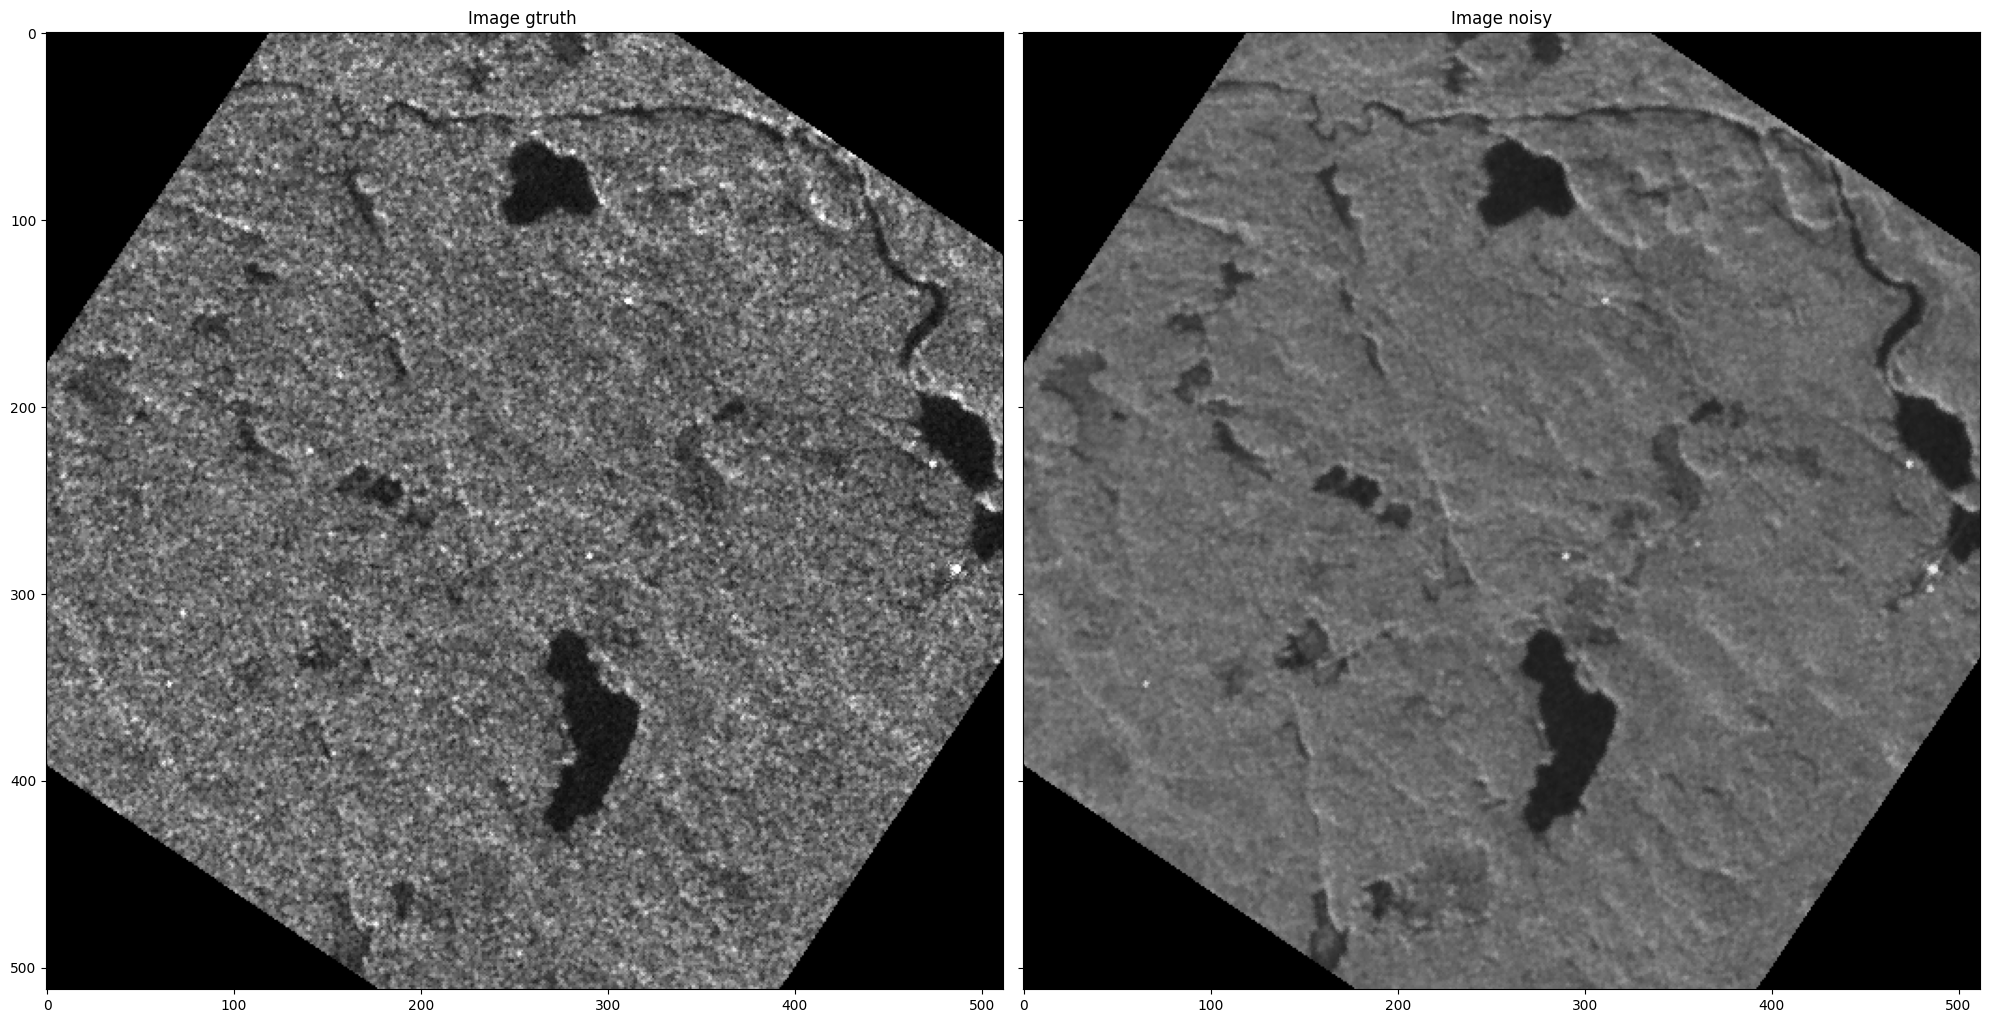

In [11]:
index = randint(0, len(folder_noisy)-1)

#Cargar imagenes de muestra
img_noisy = Image.open(folder_noisy[1])
img_gtruth = Image.open(folder_gtruth[1])

#Transformar images de muestra
img_noisy = transform_image(image = img_noisy.convert("RGB"),values=transforms_values)
img_gtruth = transform_image(image = img_gtruth.convert("RGB"),values = transforms_values)

#Visualizar la comparativa de las transformadas
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 20))
ax[0].imshow(img_noisy,cmap = plt.get_cmap('gray'))
ax[0].set_title('Image gtruth ')
ax[1].imshow(img_gtruth, cmap = plt.get_cmap('gray'))
ax[1].set_title('Image noisy')
fig.tight_layout()

Ciclo para aumentar las imagenes aplicandoles transformadas de rotacion y flip

In [7]:
for noisy, gtruth in zip(folder_noisy, folder_gtruth):
    display(f"Transformando {noisy},{gtruth}")
    hd_preprocess.create_augmented_data(noisy, NOISY_FOLDER,preffix_name='_a')
    hd_preprocess.create_augmented_data(gtruth, GTRUTH,preffix_name='_a')


'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_3584.tiff'

Cambiar la extencion de para trabajar con imagenes con extencion PNG

In [8]:
for noisy, gtruth in zip(folder_noisy, folder_gtruth):
    display(f"Transformando {noisy},{gtruth}")
    hd_preprocess.change_extencion(noisy, 'png')
    hd_preprocess.change_extencion(gtruth, 'png')

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_22016.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_22016.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8704_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8704_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_16384.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_16384.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_8192.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_8192.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_12288.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_12288.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_20992.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_20992.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_2560.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_2560.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15872_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15872_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_4096.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_4096.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_6144.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_6144.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_15872.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_15872.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_10240.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_10240.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_5632.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_5632.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11264_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11264_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4608_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4608_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_11776.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_11776.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14848_6656.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14848_6656.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_17408.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_17408.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/0_17920.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/0_17920.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_19456.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_19456.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_2048.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_2048.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/11776_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/11776_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_19968.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_19968.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_12800.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_12800.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3072_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3072_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_1536.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_1536.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_23552.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_23552.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_25088.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_25088.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_18944.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_18944.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_7168.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_7168.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_21504.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_21504.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/8192_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/8192_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_10752.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_10752.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9216_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9216_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_8704.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_8704.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_5120.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_5120.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2048_22528.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2048_22528.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12800_14848.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12800_14848.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_15360.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_15360.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6144_13824.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6144_13824.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13312_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13312_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_1024.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_1024.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/512_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/512_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/12288_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/12288_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/6656_9728.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/6656_9728.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/9728_24064.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/9728_24064.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7168_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7168_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_16896.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_16896.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/2560_512.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/2560_512.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_14336.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_14336.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10240_0.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10240_0.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/13824_9216.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/13824_9216.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/7680_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/7680_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_24576.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_24576.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_23040.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_23040.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_3584.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/3584_7680.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/3584_7680.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_20480.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_20480.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/4096_13312.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/4096_13312.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1024_18432.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1024_18432.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/10752_4608.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/10752_4608.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/1536_11264.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/1536_11264.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/15360_3072.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/15360_3072.tiff'

'Transformando /home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/Noisy/14336_3584.tiff,/home/arthemis/Documents/pytorch_env/pytorch_env/transformers_ruben/src/data/raw_data/GTruth/14336_3584.tiff'

Buscar nuevamente la imagenes aumentadas pero esta vez con extencion PNG

In [9]:
folder_noisy = handler_files.search_load_files_extencion(path_search = NOISY_FOLDER.as_posix(),ext=['png'])['png'][1]
folder_gtruth = handler_files.search_load_files_extencion(path_search = GTRUTH.as_posix(),ext=['png'])['png'][1]

Separar aleatoriamente para el train y el test para las imagenes Noisy

In [10]:
test_original, train_original  = hd_preprocess.create_split_train_test_data(folder_noisy,0.8)

Se hace lo mismo para para buscar las imagenes equivalente en Ground truth

In [14]:
train_gt, test_gt = hd_preprocess.buscar_valores([Path(image).name for image in list(train_original)], [Path(image).name for image in folder_gtruth])

Agregar la extencion para mover las imagenes

In [16]:
train_gt = [GTRUTH/image for image in train_gt]
test_gt = [GTRUTH/image for image in test_gt]


Mover las imagenes de train y test, tanto de noisy como ground truth a sus respectivas carpetas para el entrenamiento

In [23]:
hd_preprocess.move_images(train_original, AUMENTED_DATA_NOISY )
hd_preprocess.move_images(test_original, VALIDATION_NOISY )
hd_preprocess.move_images(train_gt, AUMENTED_DATA_GTRUTH )
hd_preprocess.move_images(test_gt, VALIDATION_GT )